<a href="https://colab.research.google.com/github/prernasinghal88/Are-you-sure-to-Insure-/blob/version-3/greyatom_gonzalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurer Project

Import libraries

In [0]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Download the data

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load dataset

test = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/greyatom/test.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/greyatom/train.csv')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks (1)/greyatom/sample_submission.csv')

In [16]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


## Data Exploration Analysis and Data Cleaning



In [63]:
df.dtypes

Agency                        object
Distribution Channel          object
Product Name                  object
Claim                          int64
Duration                       int64
Destination                   object
Net Sales                    float64
Commision                    float64
age_0                          uint8
age_1                          uint8
age_2                          uint8
age_3                          uint8
Agency_type_Airlines           uint8
Agency_type_Travel Agency      uint8
dtype: object

In [64]:
pip install pandas-profiling

### Profile Report

In [19]:
import pandas_profiling
pandas_profiling.ProfileReport(df)


Number of variables,12
Number of observations,50553
Total Missing (%),5.9%
Total size in memory,4.6 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
#pfr = pandas_profiling.ProfileReport(df)
#pfr.to_file("/tmp/example.html")

In [0]:
#pfr

#### Pairplot

Pairplot Vizualization - By categorical element: "Claim"

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


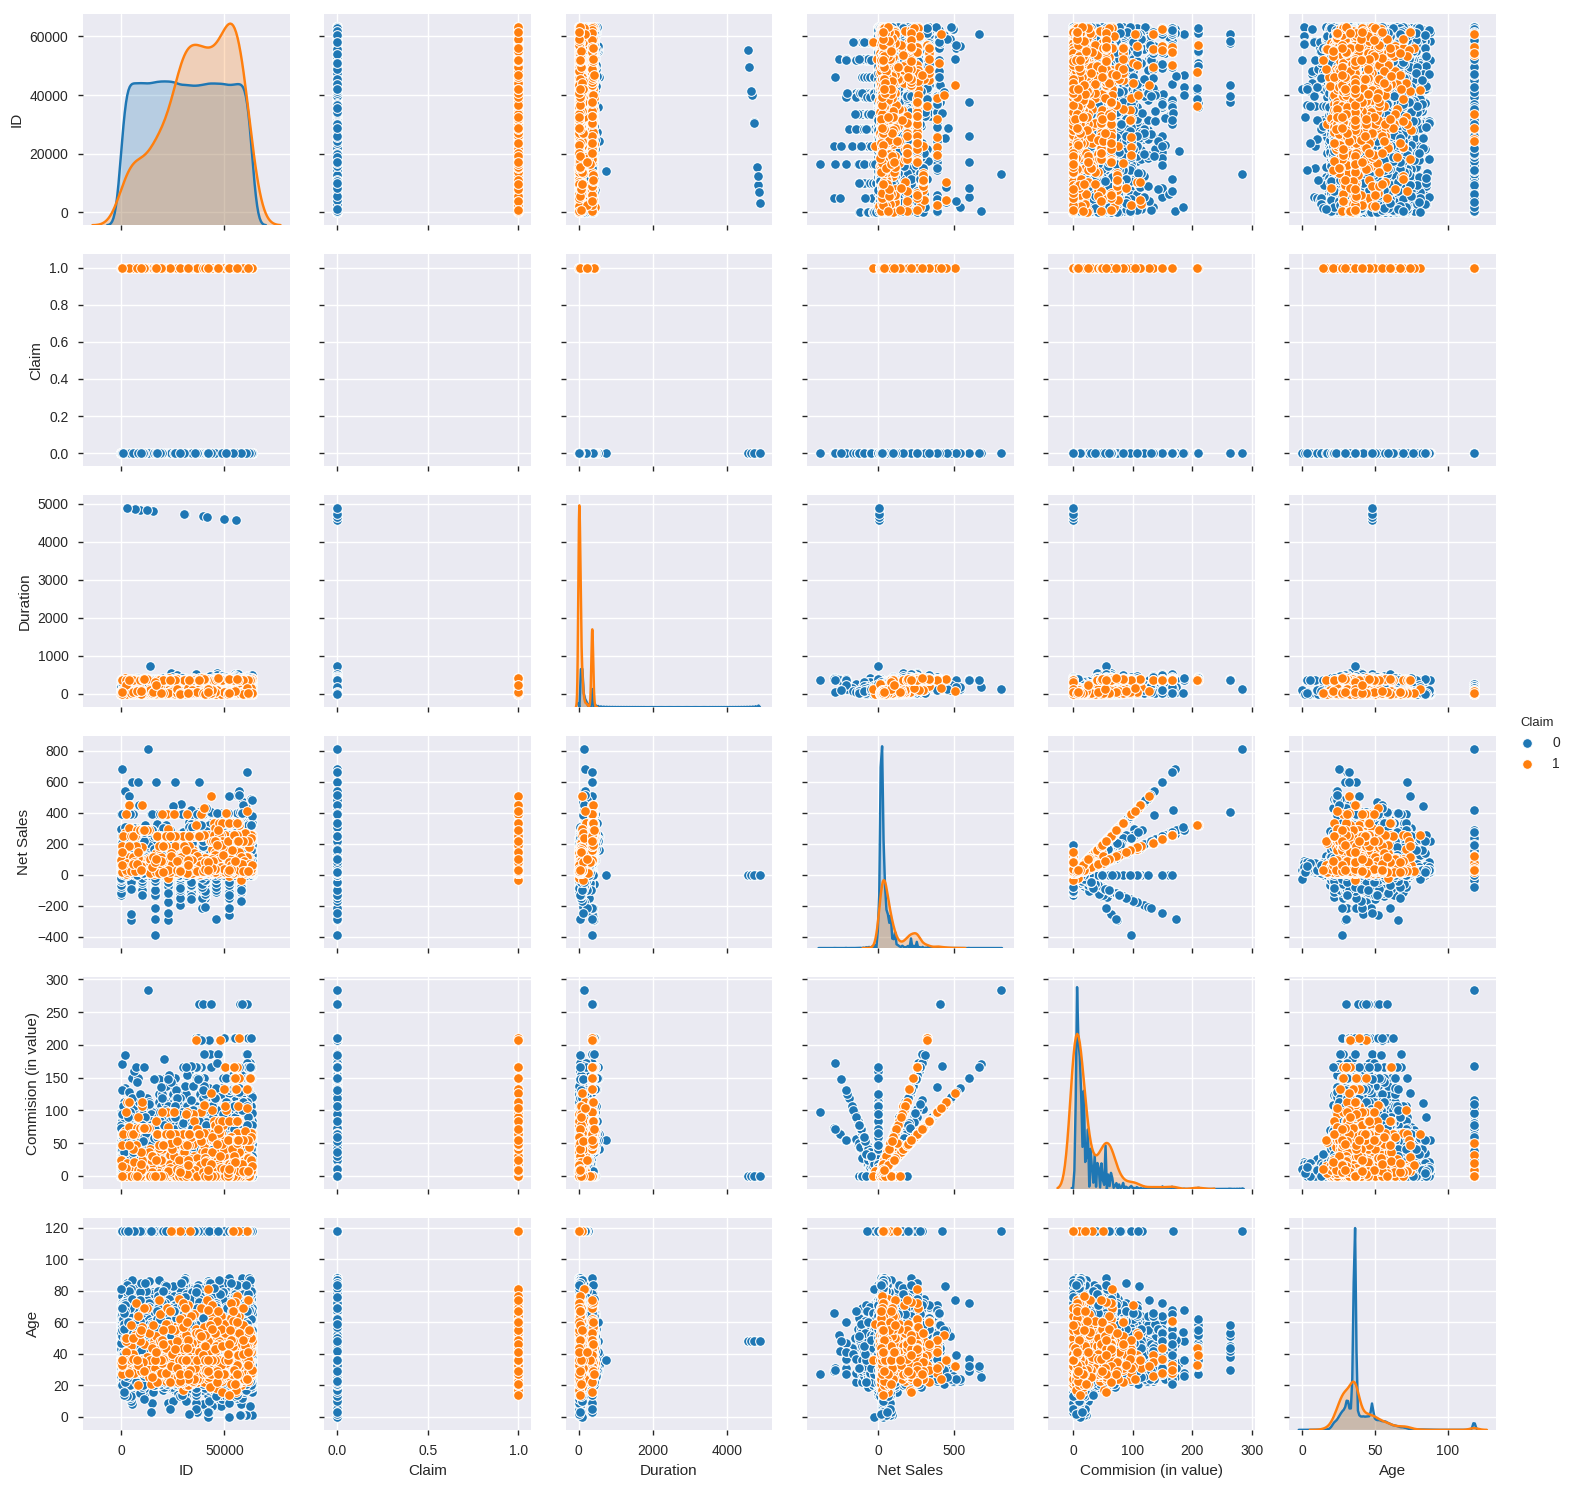

In [20]:
sns.pairplot(df, hue='Claim')

####  Agency Type Analysis

Claim rate from Agency Type 'Airlines" is 3.5% whereas Agency type "Travel Agent" is only 1%.'

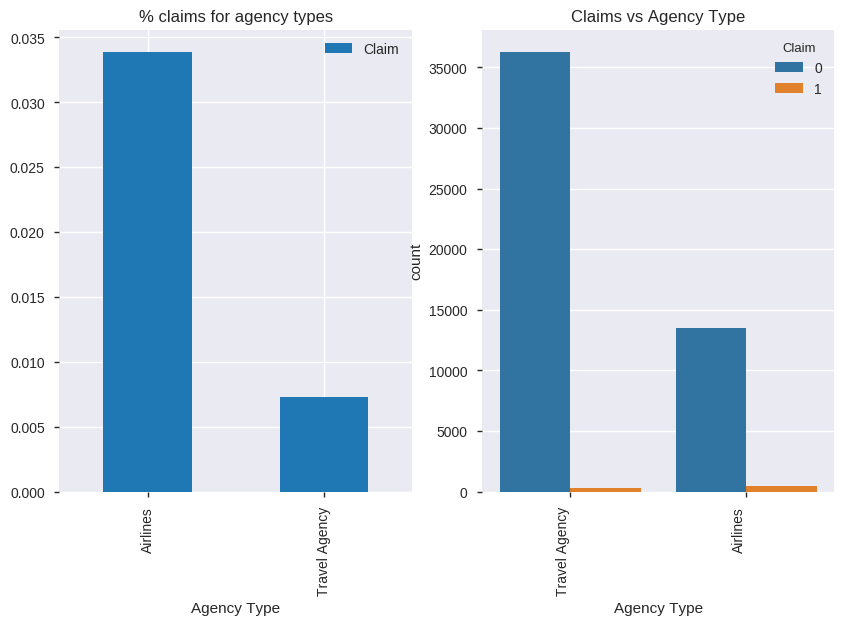

In [21]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df[['Agency Type','Claim']].groupby(['Agency Type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Agency Type',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#### Claims and Age Analysis

Text(0.5, 1.0, 'Claims Rate by Age')

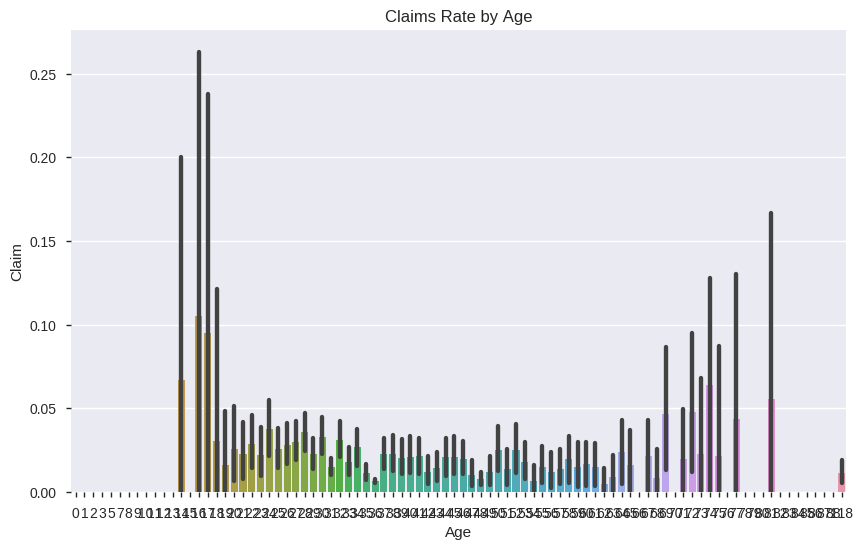

In [23]:
f,ax=plt.subplots(1, figsize=(10,6))
sns.barplot(x='Age',y='Claim',data=df)
ax.set_title('Claims Rate by Age')

#### Claims and Product Name Analysis

Most of the passed claims are from Product Name 'Bronze Plan", followed by "Annnual Silvver' and "2 Way Comprenhensive"

However, Annual travel protect Gold has highest % of claims getting passed which is around 12%, followed by Annual Gold Plan and Annual Silver Plan


In [0]:
#Visualization on Claims only
claim_y = df[df['Claim'] ==1]

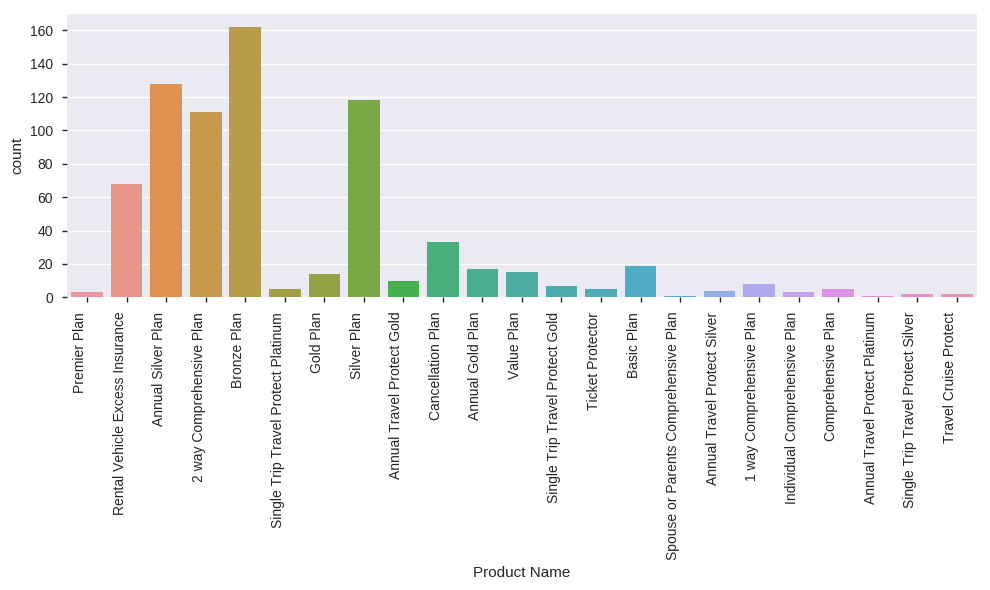

In [25]:
f,ax=plt.subplots(1, figsize=(10,6))
ax = sns.countplot(x='Product Name',data=claim_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

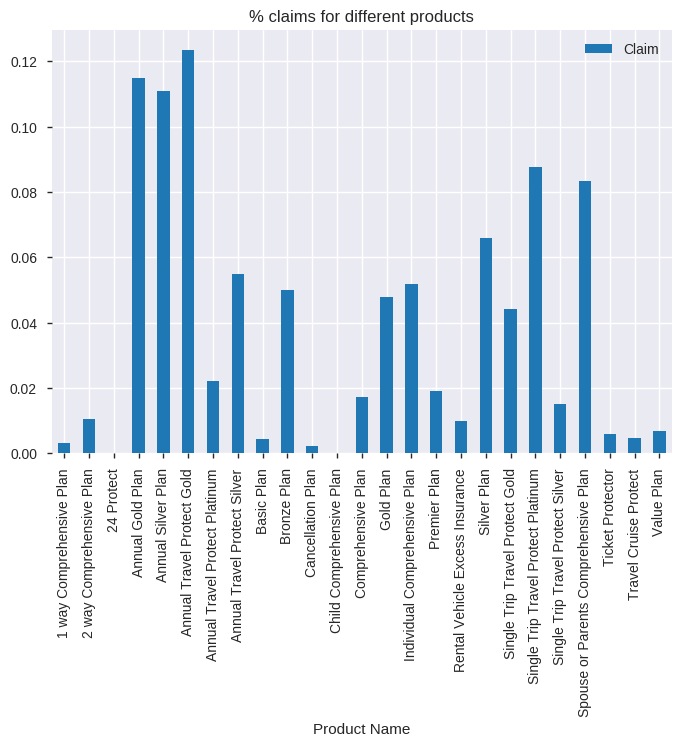

In [28]:
df[['Product Name','Claim']].groupby(['Product Name']).mean().plot.bar()
plt.title('% claims for different products')
plt.show()

#### Claims and Distribution Channel Analysis

In [26]:
df.groupby(['Distribution Channel','Claim'])['Claim'].count()

Distribution Channel  Claim
Offline               0          871
                      1           17
Online                0        48941
                      1          724
Name: Claim, dtype: int64

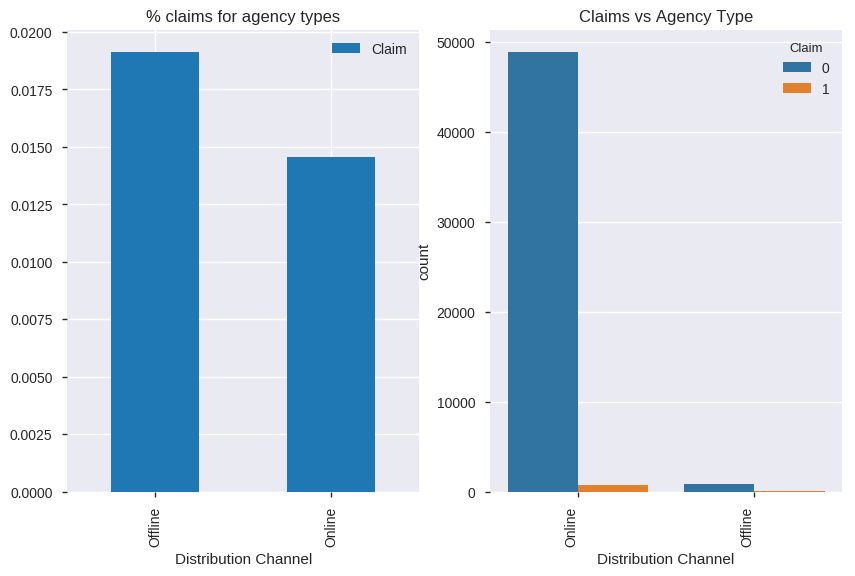

In [29]:
f,ax=plt.subplots(1,2,figsize=(10,6))
df[['Distribution Channel','Claim']].groupby(['Distribution Channel']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for agency types')
sns.countplot('Distribution Channel',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs Agency Type')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


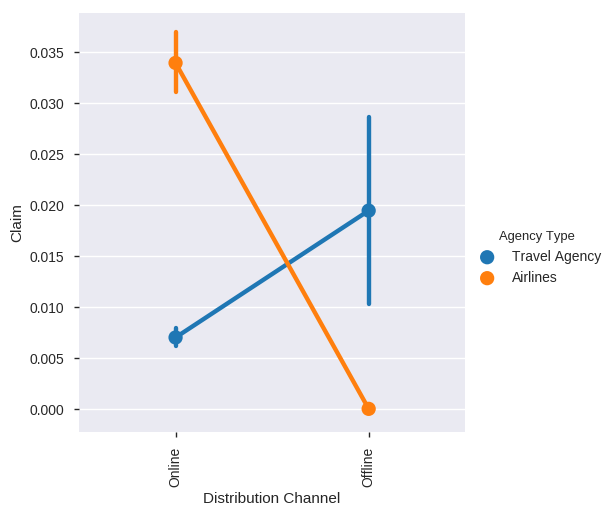

In [30]:
sns.factorplot('Distribution Channel','Claim',hue='Agency Type',data=df)
plt.xticks(rotation= 90)
plt.show()

#### Crosstab  Analysis for top variables

Majority of the Claims sold are coming from online channel, Agency type and "Cancellation Plan" product.

Interesting thing to note is none of the claim is passed in case it is sold by Airlines from offline distribution channel.

In [31]:
pd.crosstab([df['Distribution Channel'],df['Agency Type'],df['Claim']],df['Product Name'],margins=True)

Product Name                              1 way Comprehensive Plan  ...    All
Distribution Channel Agency Type   Claim                            ...       
Offline              Airlines      0                             0  ...     14
                     Travel Agency 0                             2  ...    857
                                   1                             2  ...     17
Online               Airlines      0                             0  ...  13490
                                   1                             0  ...    474
                     Travel Agency 0                          2638  ...  35451
                                   1                             6  ...    250
All                                                           2648  ...  50553

[8 rows x 26 columns]

#### Claims and Product Name Analysis

In [32]:
print('Maximum net sales :',df['Net Sales'].max())
print('Minimum Net sales :',df['Net Sales'].min())
print('Average Net Sales :',df['Net Sales'].mean())

Maximum net sales : 810.0
Minimum Net sales : -389.0
Average Net Sales : 40.80097659881748


#### Remove Negative Value - Net Sales

In [0]:
#Remove negative values( we are not removing negative values for net sales)
#df['Net Sales'][df['Net Sales'] < 0] = 0
#print('Minimum Net sales :',df['Net Sales'].min())

Minimum Net sales : 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Remove Negative Value - Duration

In [33]:
print('Minimum Duration :',df['Duration'].min())


Minimum Duration : -2


In [65]:
df['Duration'][df['Duration'] < 0] = 0
print('Minimum Duration :',df['Duration'].min())

Minimum Duration : 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[8.0, 5.5]


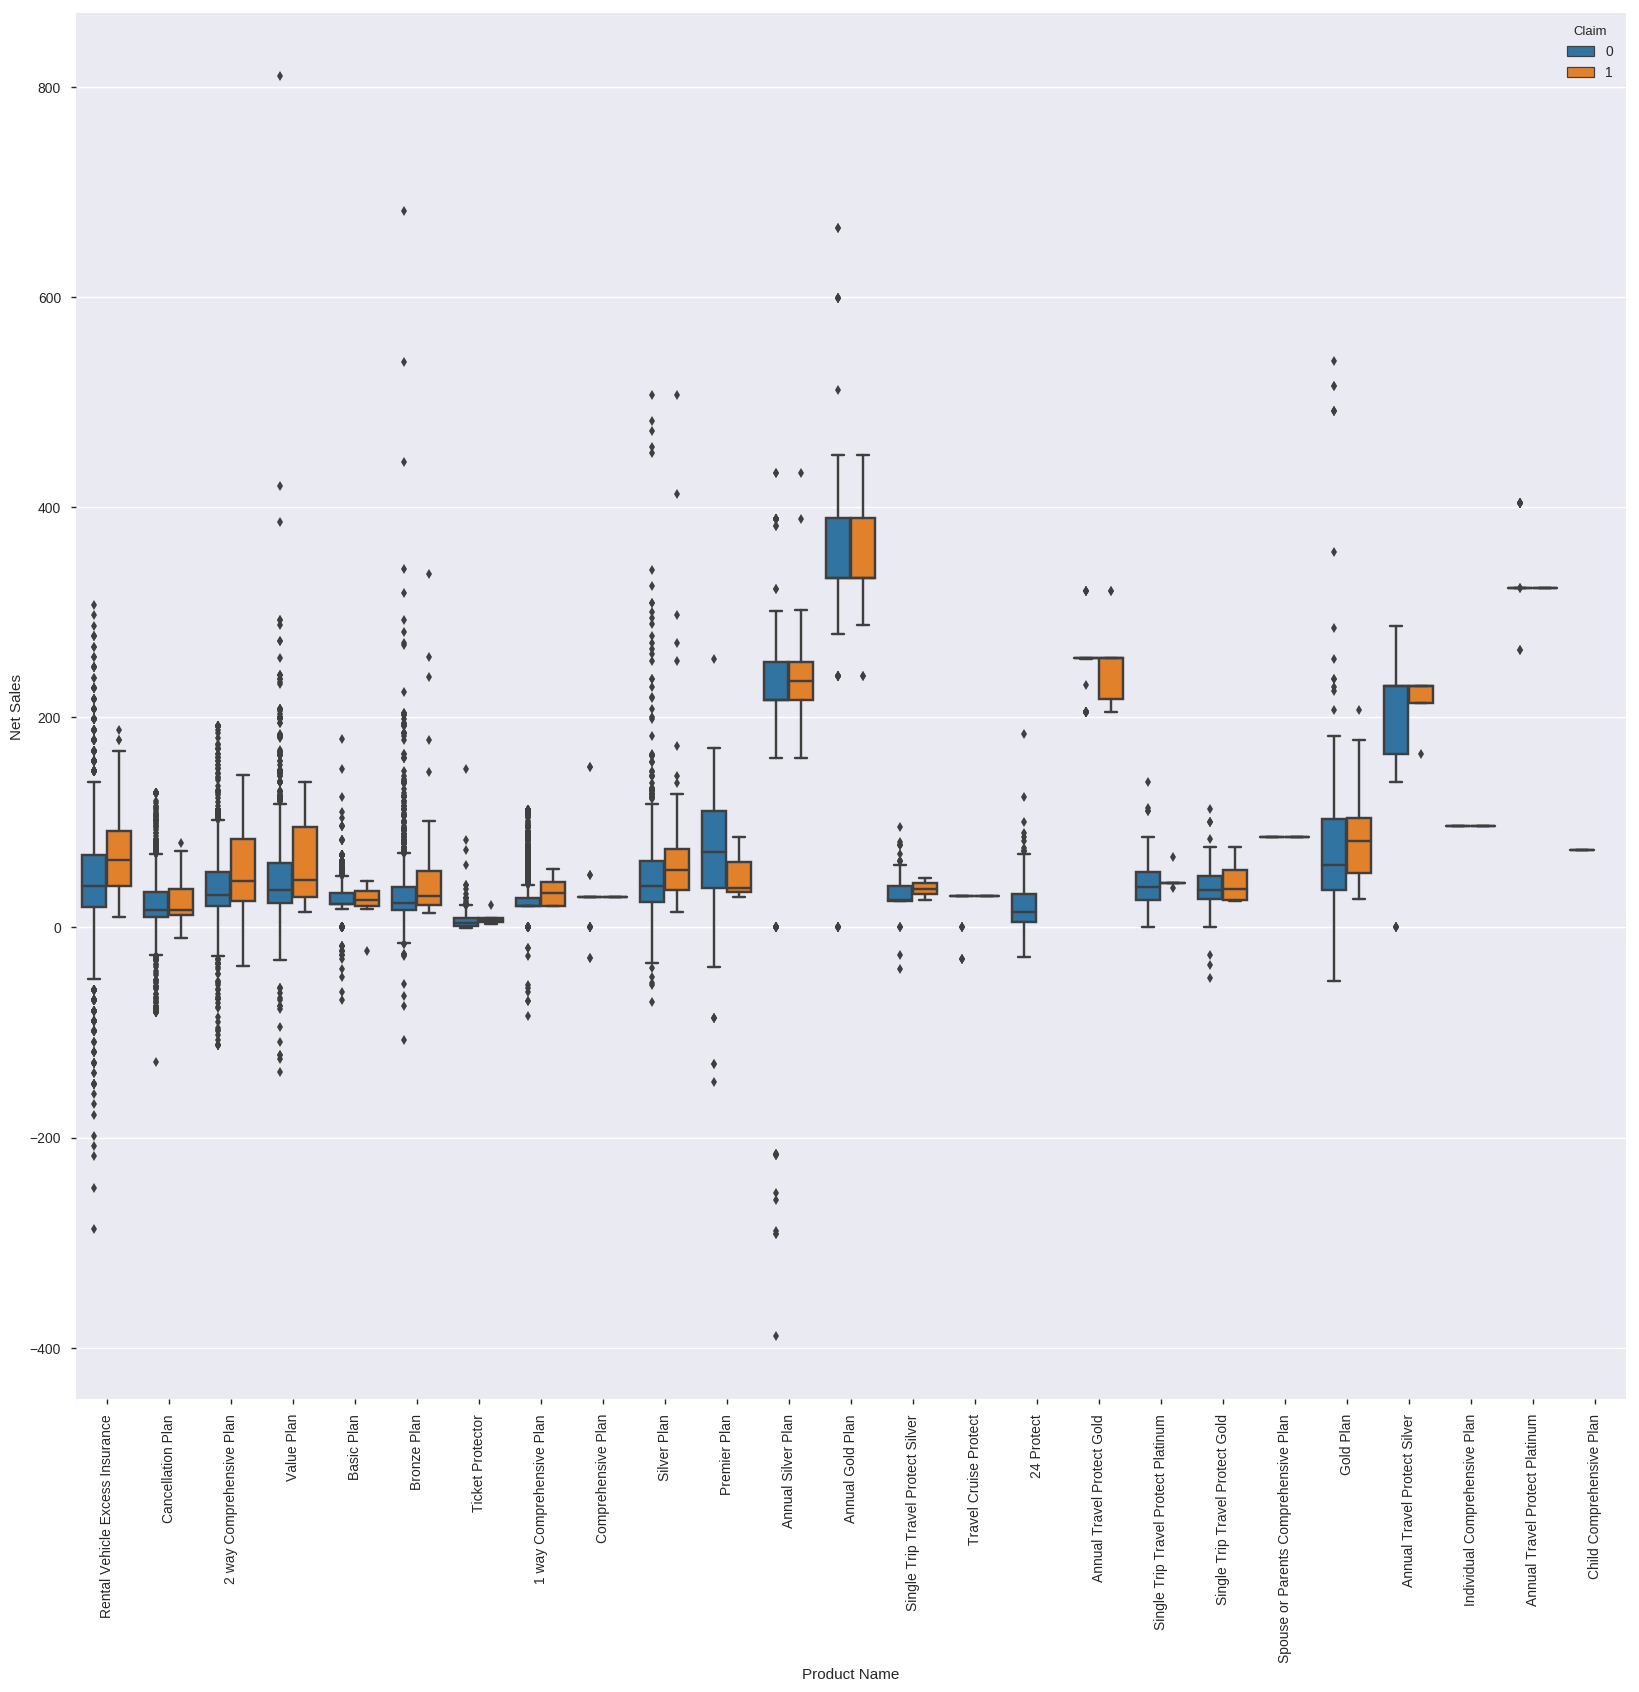

In [35]:

fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 20
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Net Sales',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

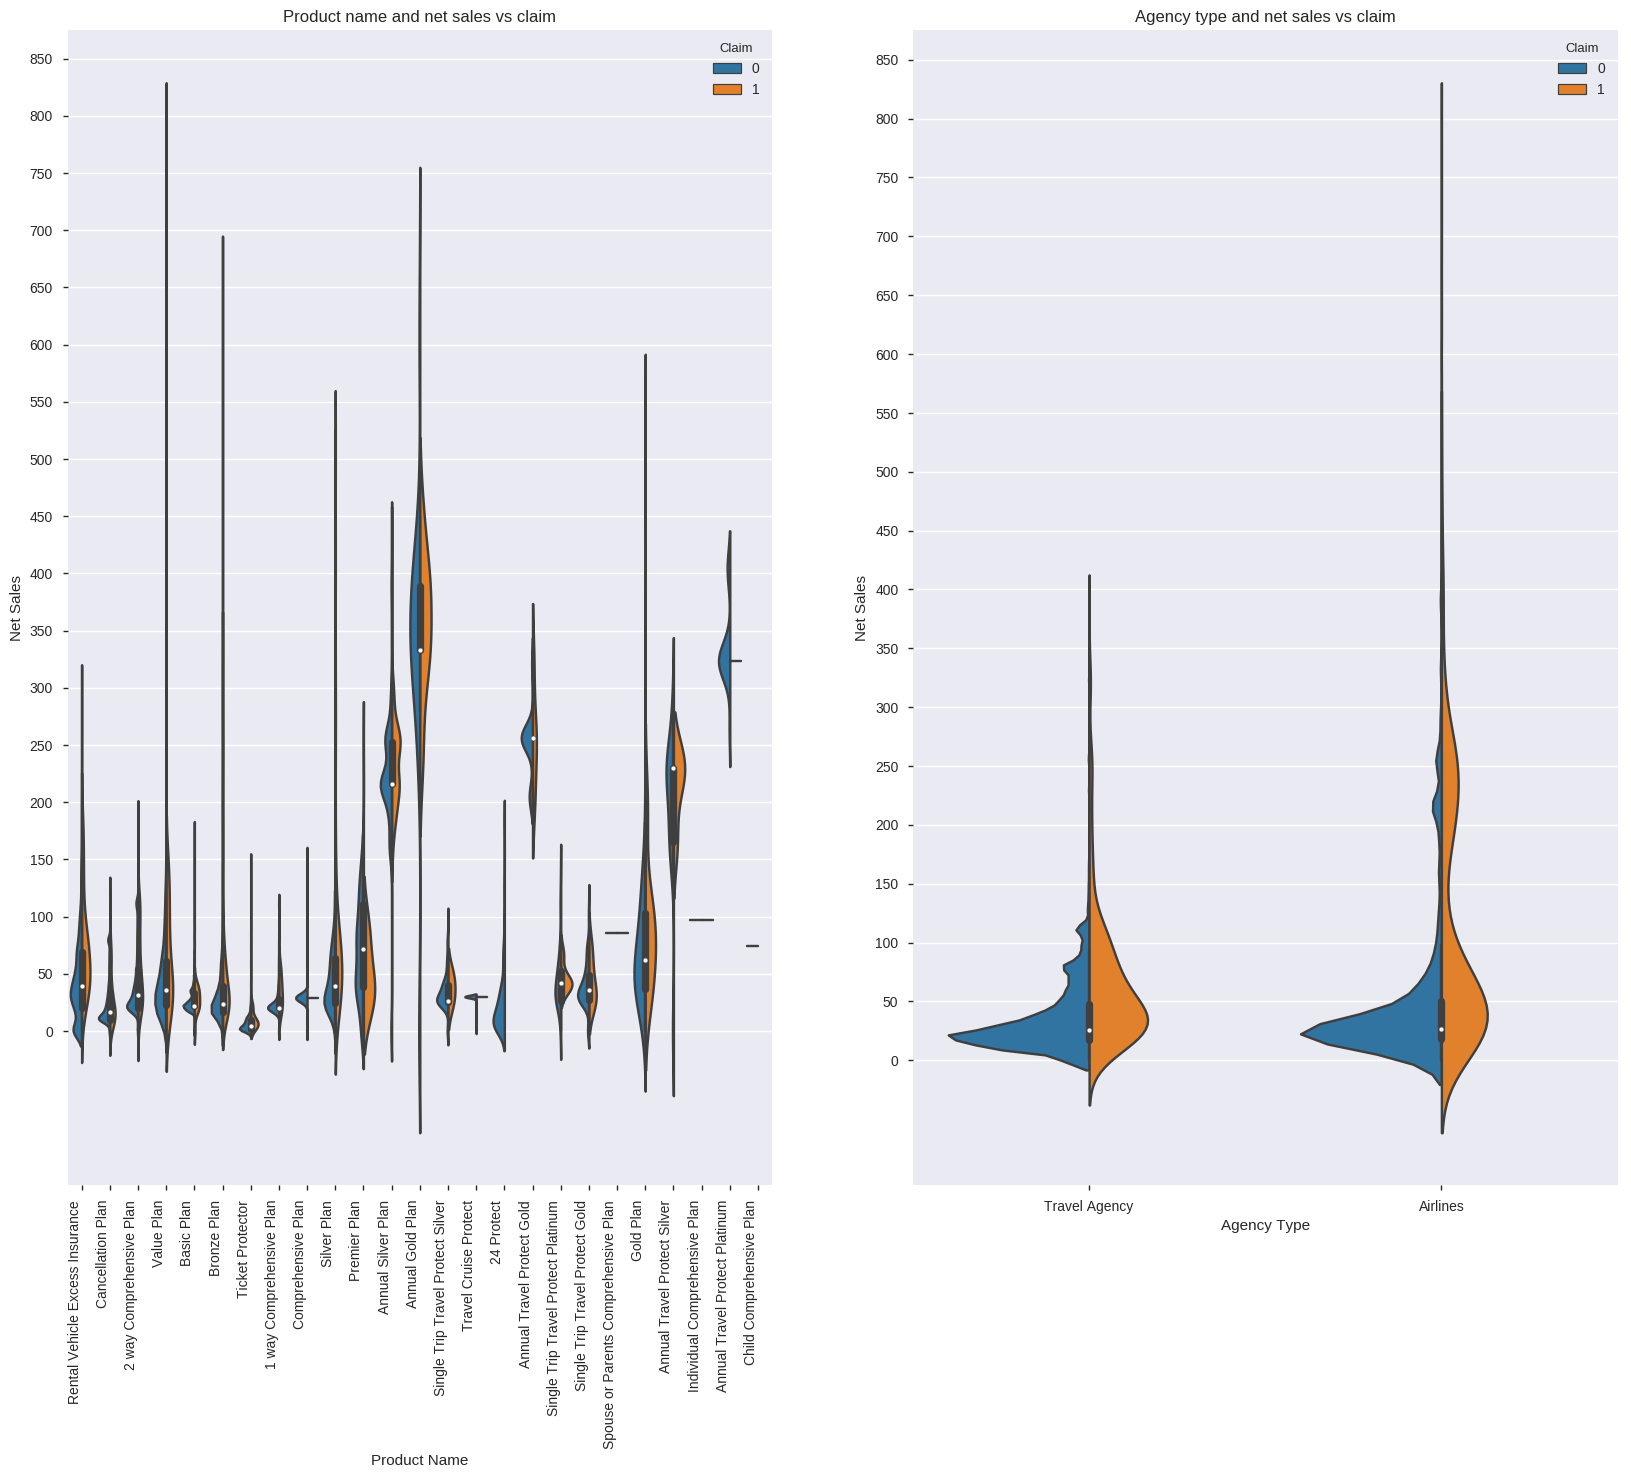

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,15))
sns.violinplot("Product Name","Net Sales", hue="Claim", data=df,split=True,ax=ax[0])
ax[0].set_title('Product name and net sales vs claim')
ax[0].set_yticks(range(0,900,50))
sns.violinplot("Agency Type","Net Sales", hue="Claim", data=df,split=True,ax=ax[1])
ax[1].set_title('Agency type and net sales vs claim')
ax[1].set_yticks(range(0,900,50))
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

[20.0, 18.0]


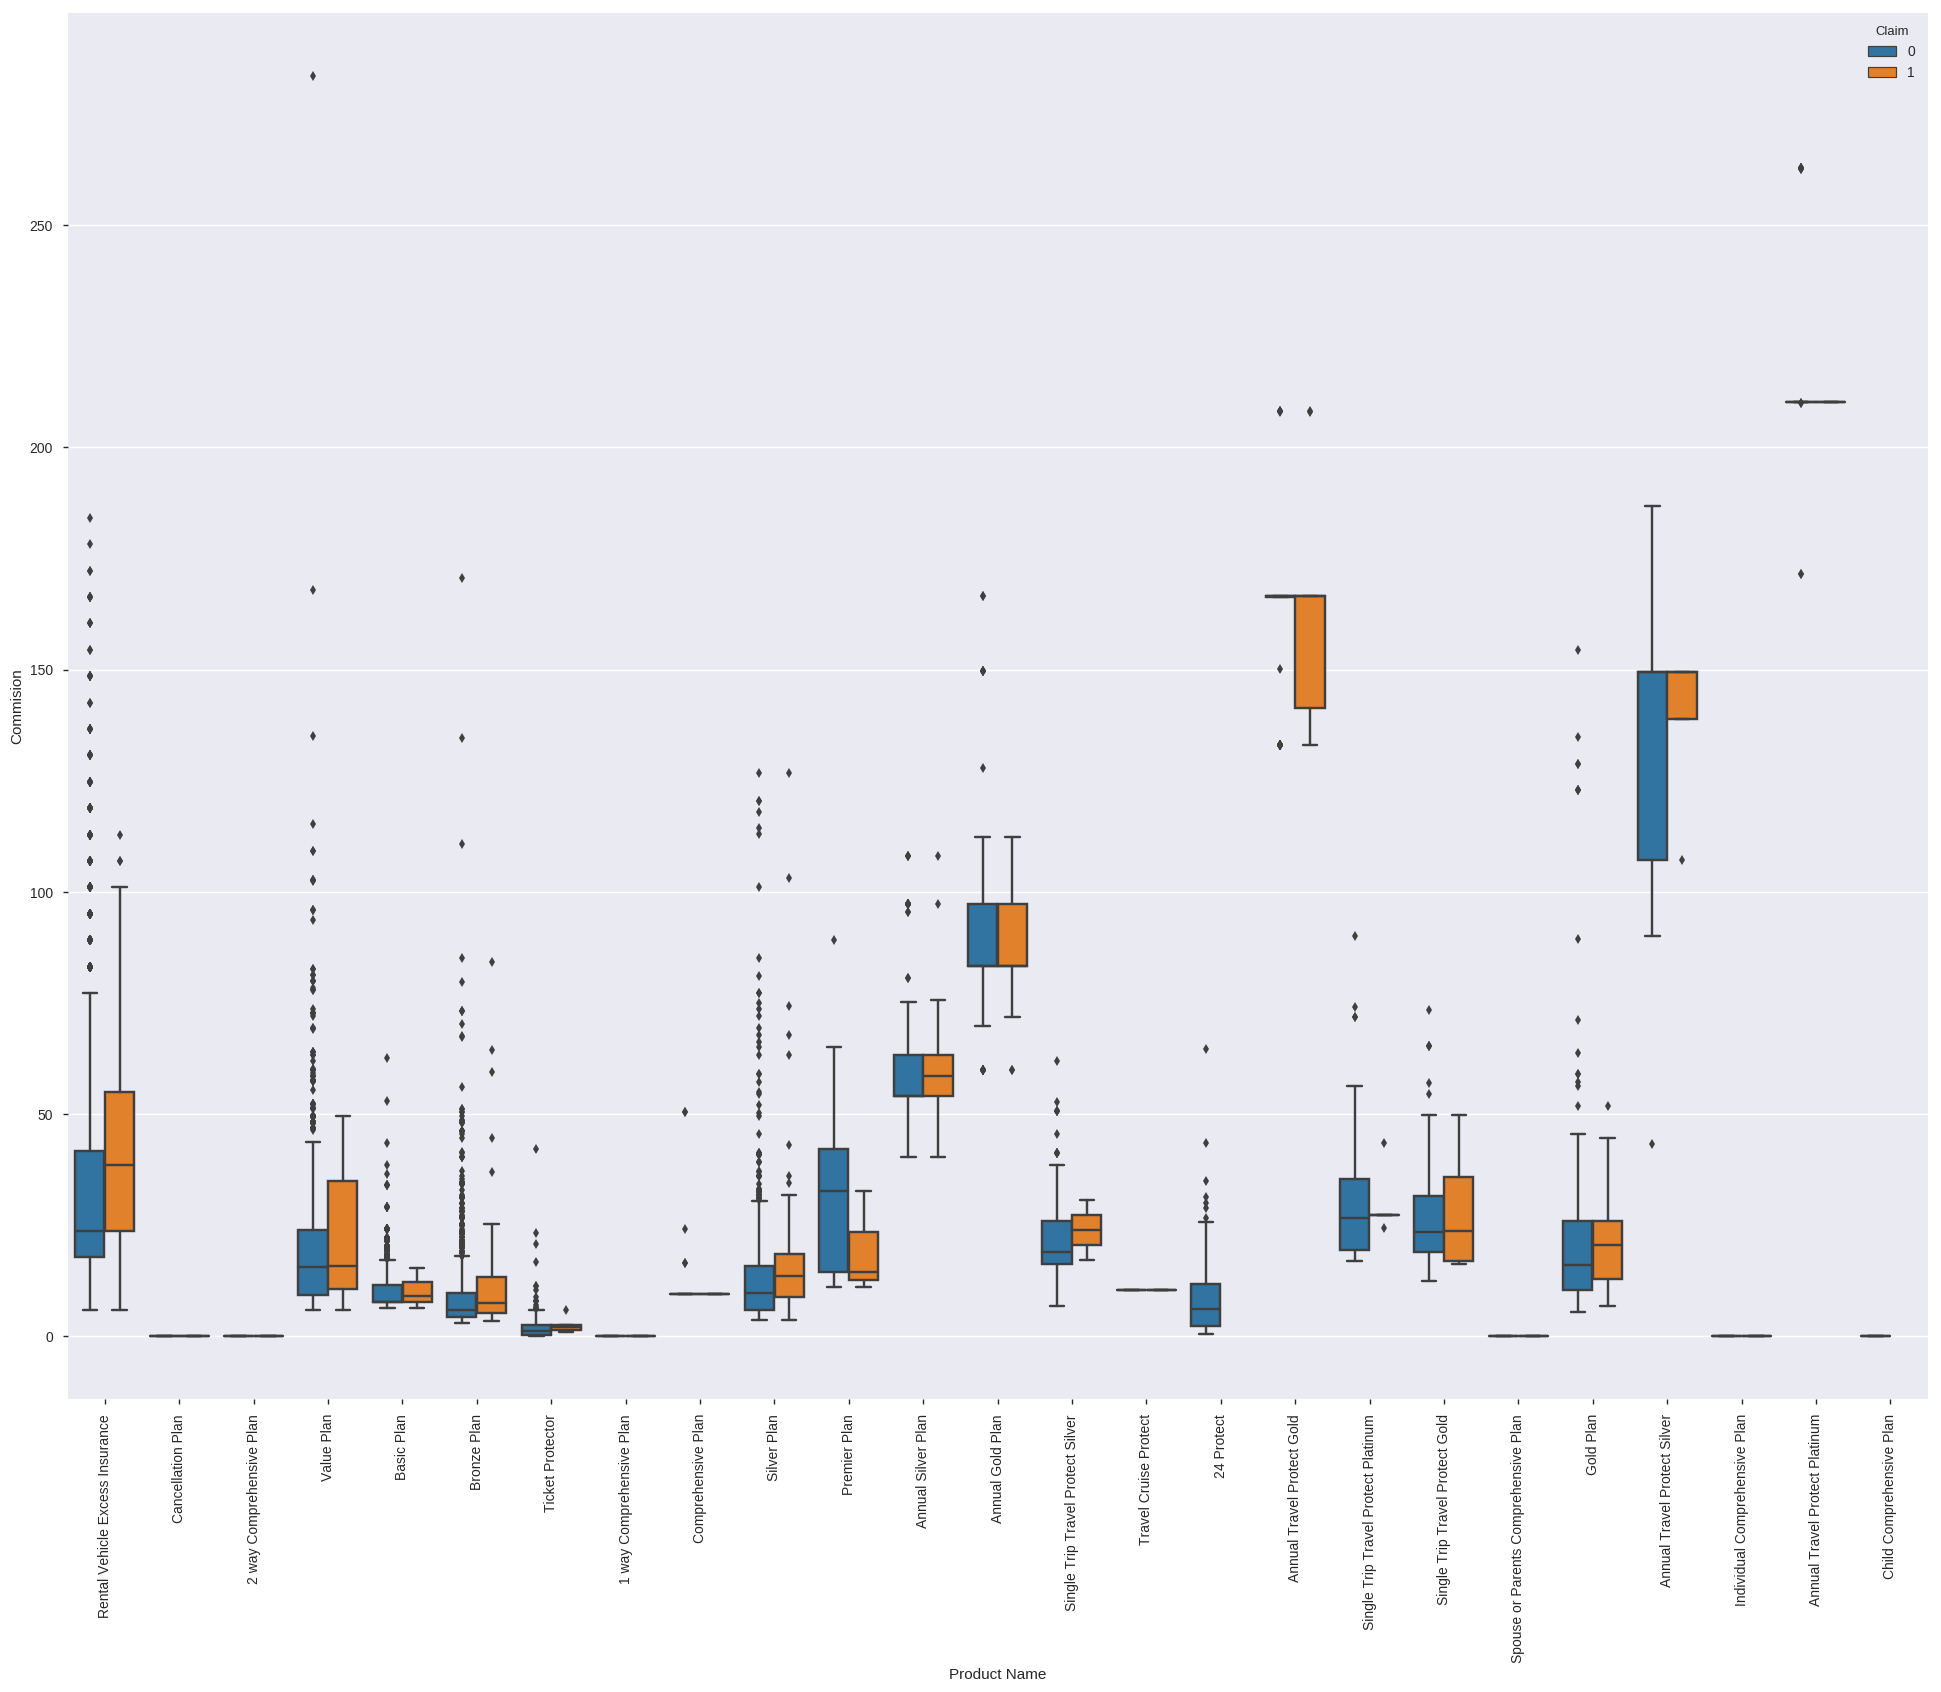

In [36]:
df.rename(columns={'Commision (in value)':'Commision'}, 
                 inplace=True)
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

sns.boxplot(x = 'Product Name', y = 'Commision',hue='Claim' ,data = df) 
plt.xticks(rotation= 90)
plt.show()

#### Age Category: Grouping and transormation

In [66]:
df['age_category'] = pd.cut(x=df['Age'], bins=[-1,17,36,65,120], labels=['0','1','2', '3'])


KeyError: ignored

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 14 columns):
Agency                       50553 non-null object
Distribution Channel         50553 non-null object
Product Name                 50553 non-null object
Claim                        50553 non-null int64
Duration                     50553 non-null int64
Destination                  50553 non-null object
Net Sales                    50553 non-null float64
Commision                    50553 non-null float64
age_0                        50553 non-null uint8
age_1                        50553 non-null uint8
age_2                        50553 non-null uint8
age_3                        50553 non-null uint8
Agency_type_Airlines         50553 non-null uint8
Agency_type_Travel Agency    50553 non-null uint8
dtypes: float64(2), int64(2), object(4), uint8(6)
memory usage: 3.4+ MB


Text(0.5, 1.0, 'Claims Rate by Age')

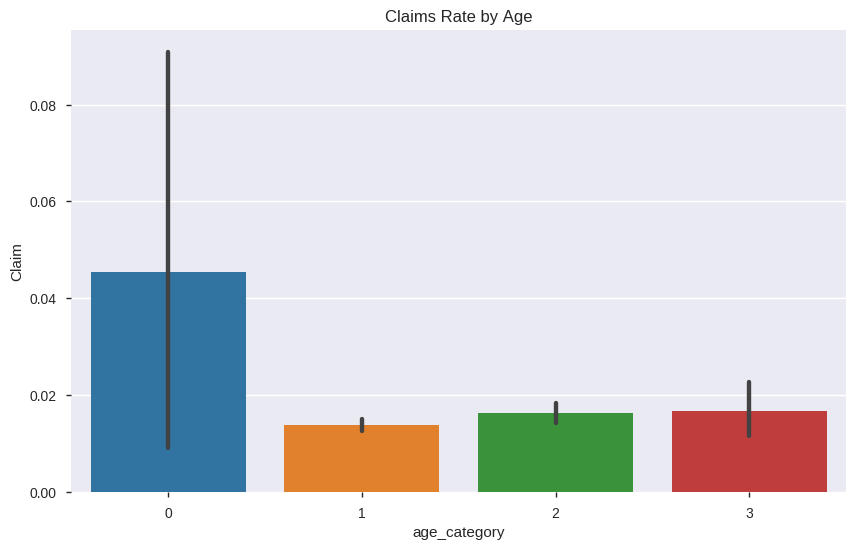

In [41]:
f,ax=plt.subplots(1, figsize=(10,6))
sns.barplot(x='age_category',y='Claim',data=df)
ax.set_title('Claims Rate by Age')

In [42]:
pd.crosstab(df['age_category'], df['Claim'])

Claim,0,1
age_category,,
0,105,5
1,32514,452
2,15246,251
3,1947,33


#### Age Category  - OneHotEncoder

Get dummy variables for age category and drop previous related "Age" features.

In [43]:
df  = pd.get_dummies(df, columns=['age_category'], prefix = ['age'])
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Gender,Age,age_0,age_1,age_2,age_3
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31,0,1,0,0
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36,0,1,0,0
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75,0,0,0,1
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32,0,1,0,0
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29,0,1,0,0


#### Destination and Claims Analysis

In [44]:
pd.crosstab(df['Destination'], df['Claim'])
#pd.crosstab(df['Destination'], df['Claim'], normalize=True)

Claim,0,1
Destination,,
ARGENTINA,16,1
AUSTRALIA,2906,28
AUSTRIA,84,0
AZERBAIJAN,6,0
BAHRAIN,11,0
BANGLADESH,83,0
BELARUS,2,0
BELGIUM,36,0
BERMUDA,2,0


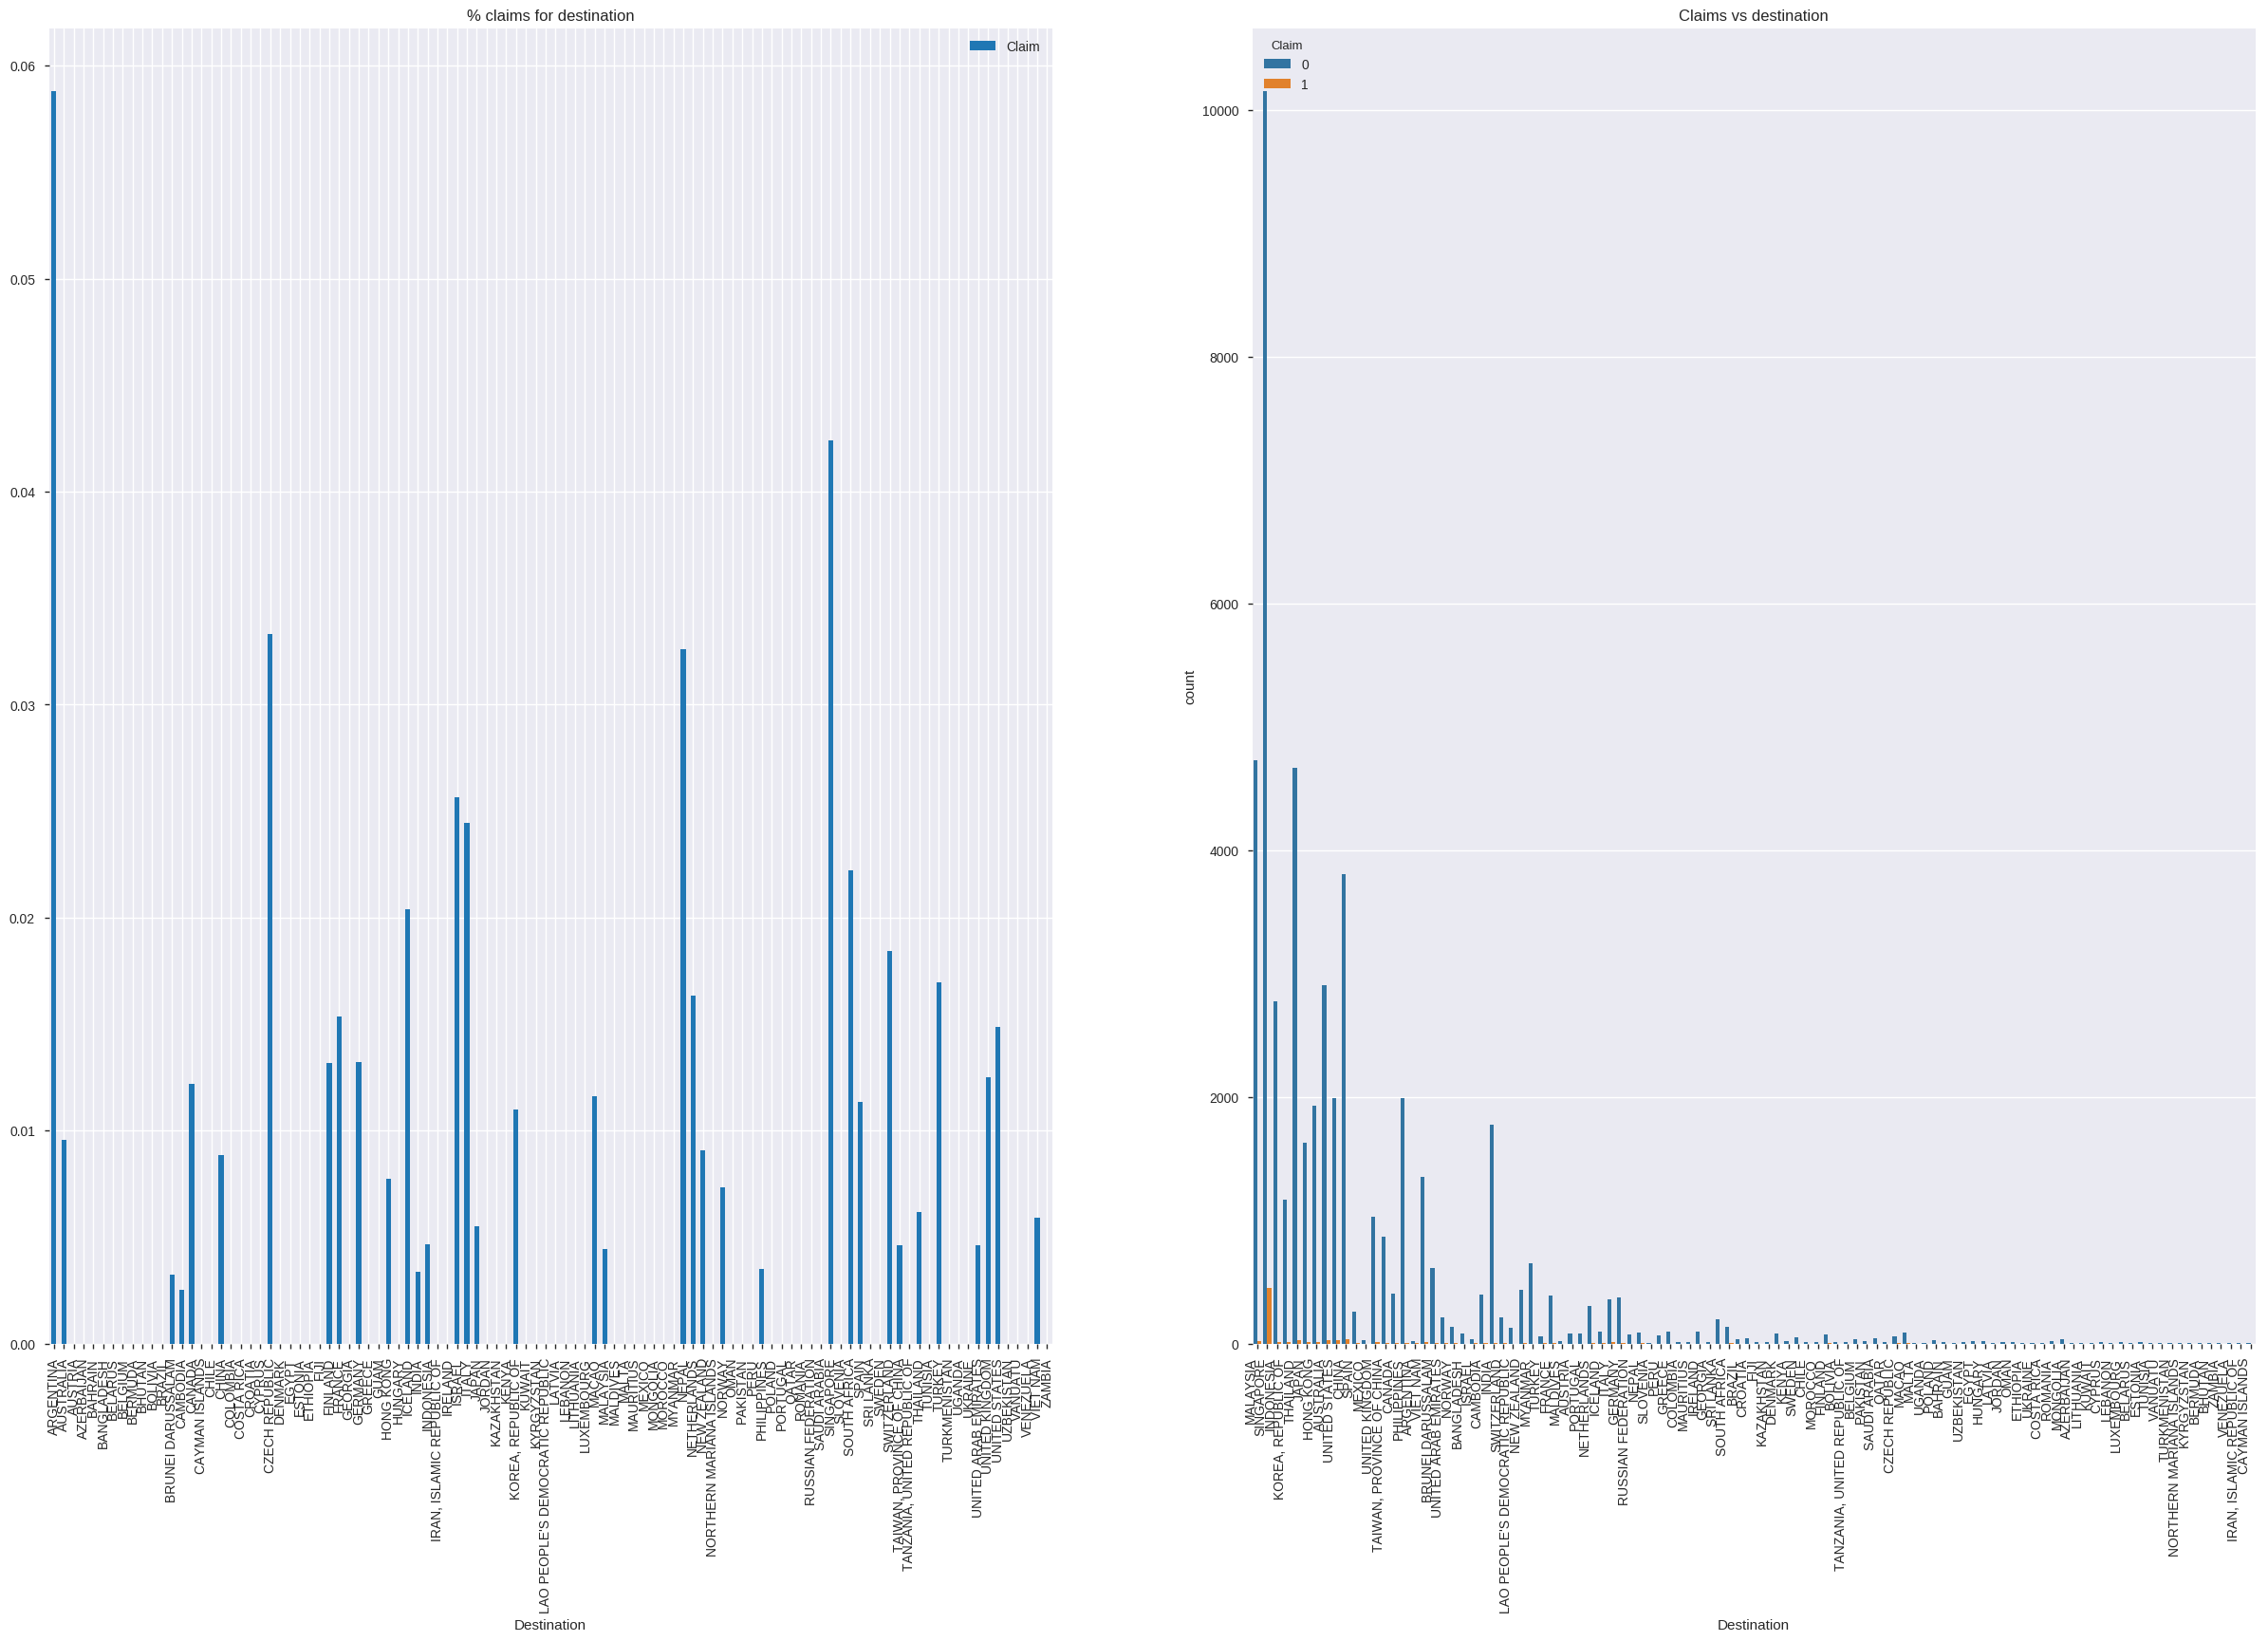

In [0]:
f,ax=plt.subplots(1,2,figsize=(30,18))
df[['Destination','Claim']].groupby(['Destination']).mean().plot.bar(ax=ax[0])
ax[0].set_title('% claims for destination')
sns.countplot('Destination',hue='Claim',data=df,ax=ax[1])
ax[1].set_title('Claims vs destination')
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#### CrossTab: Claim and Distribution Channel

96% of the bussines claims comers from Online channel.

In [60]:
pd.crosstab(df['Claim'], df['Distribution Channel'])

Distribution Channel,Offline,Online
Claim,,
0,871,48941
1,17,724


In [61]:
pd.crosstab(df['Claim'], df['Distribution Channel'], normalize=True)

Distribution Channel,Offline,Online
Claim,,
0,0.017229,0.968113
1,0.000336,0.014322


#### Agency Type - OneHotEncoder

In [62]:
df  = pd.get_dummies(df, columns=['Agency Type'], prefix = ['Agency_type'])
df.head()

KeyError: ignored

#### Correlation Analysis

The most correlated variable to our target 'Claims" is "Net Sales".'

In [68]:
# Pairwise Pearson correlations
from pandas import read_csv
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

                           Claim  ...  Agency_type_Travel Agency
Claim                      1.000  ...                     -0.099
Duration                   0.076  ...                     -0.112
Net Sales                  0.138  ...                     -0.158
Commision                  0.102  ...                     -0.178
age_0                      0.012  ...                     -0.035
age_1                     -0.011  ...                      0.329
age_2                      0.009  ...                     -0.261
age_3                      0.003  ...                     -0.180
Agency_type_Airlines       0.099  ...                     -1.000
Agency_type_Travel Agency -0.099  ...                      1.000

[10 rows x 10 columns]


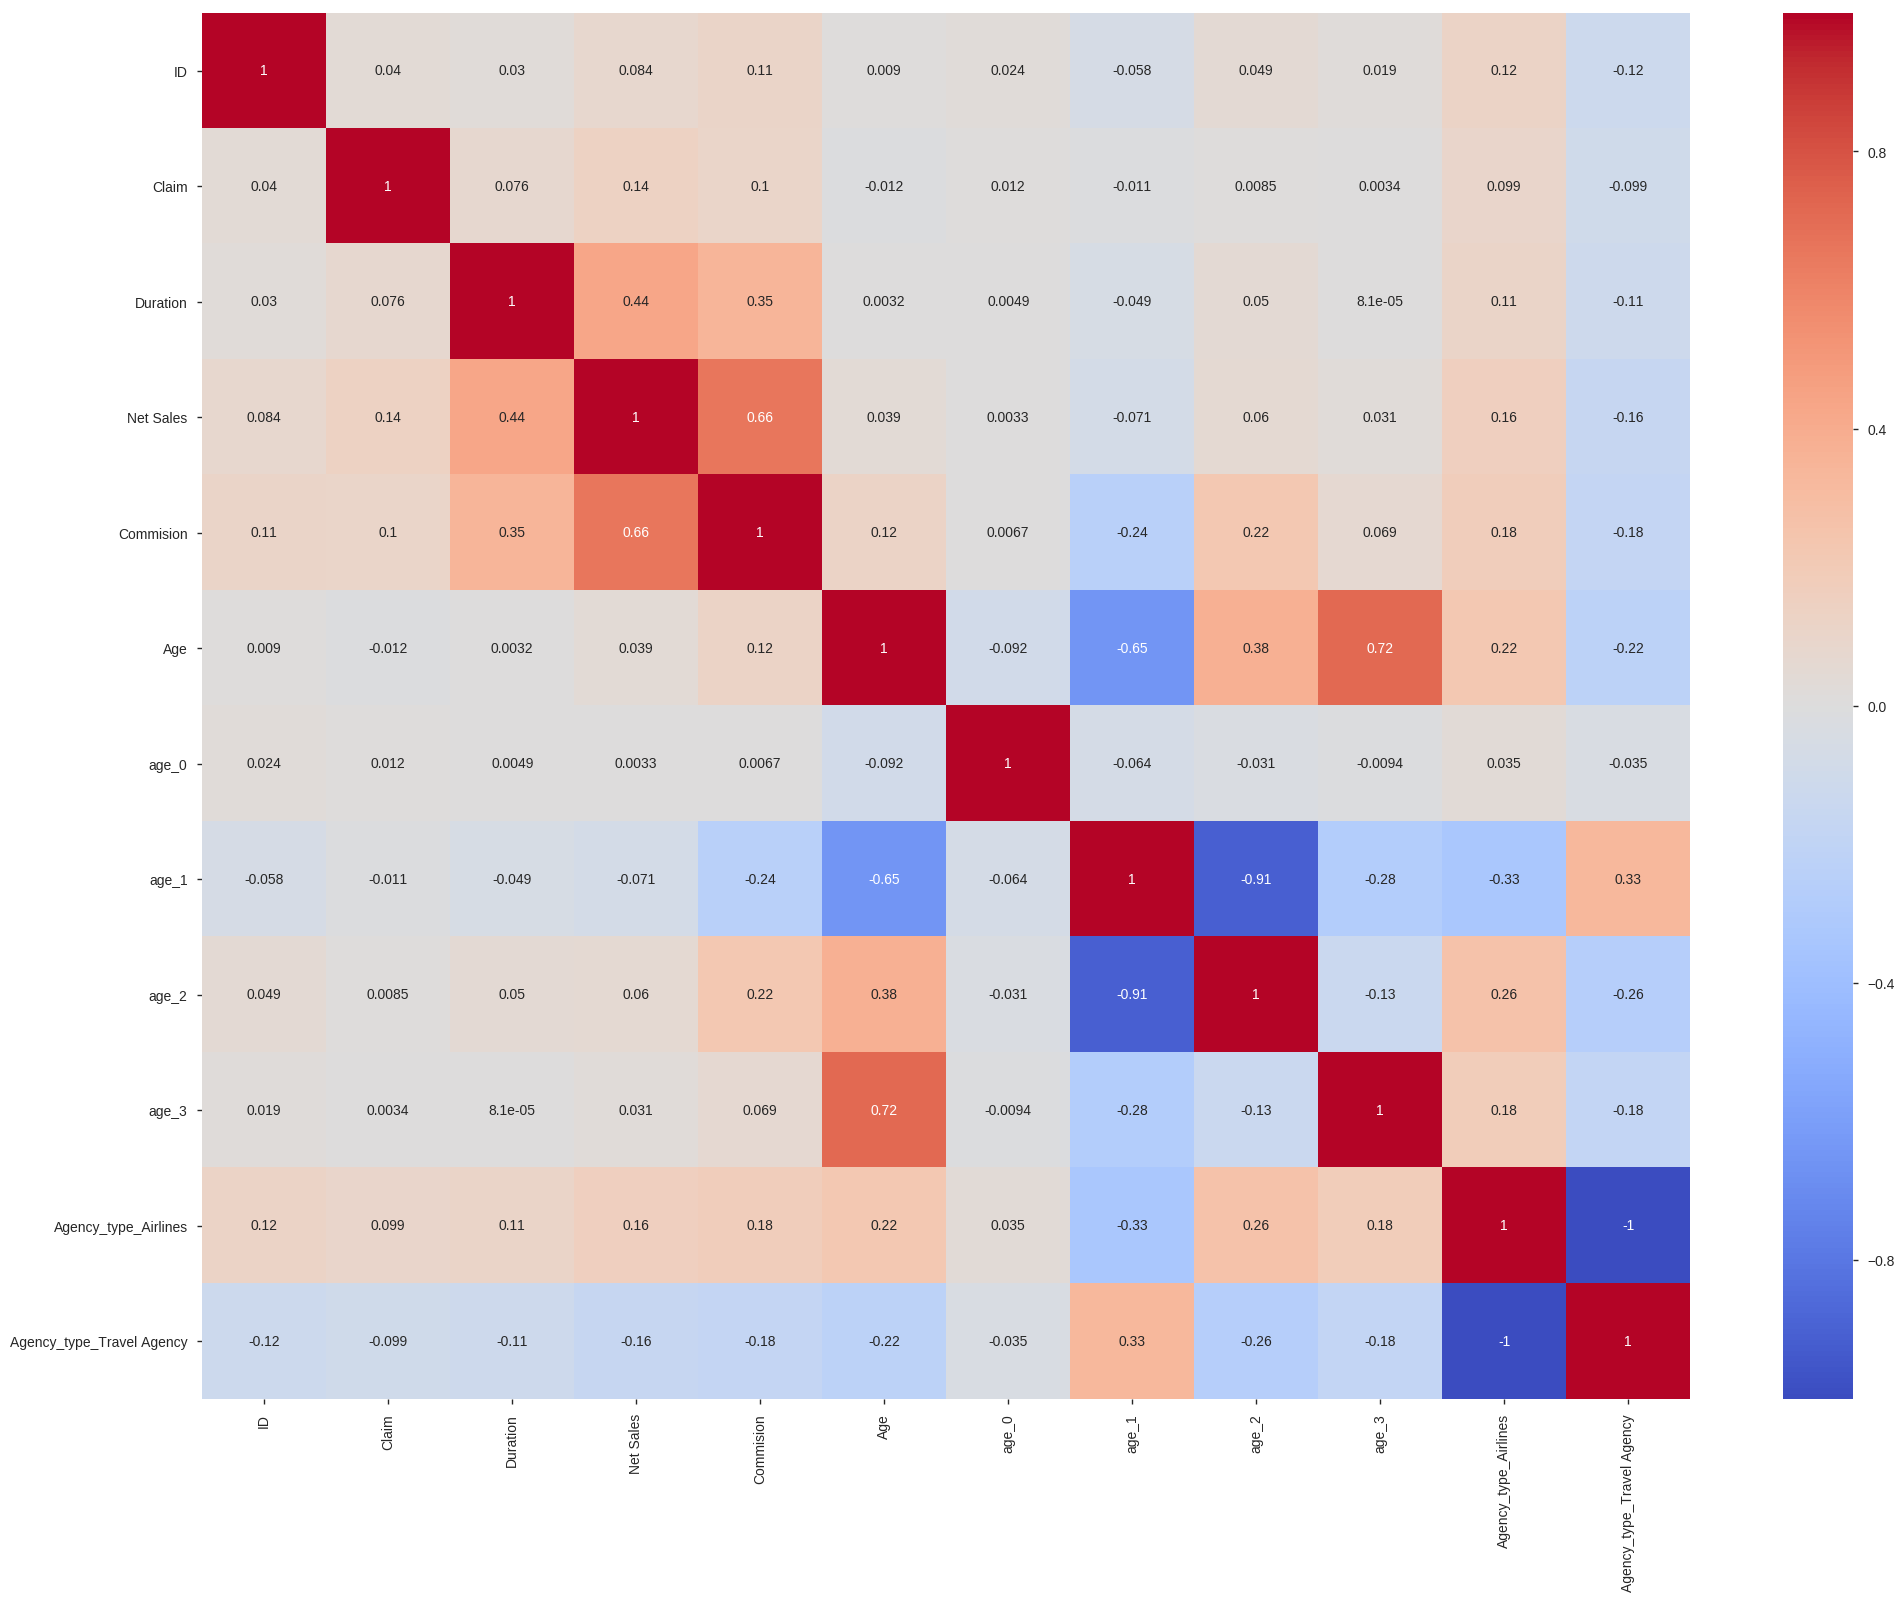

In [48]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## MIssing Data

### Detecting Missing Data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 14 columns):
Agency                       50553 non-null object
Distribution Channel         50553 non-null object
Product Name                 50553 non-null object
Claim                        50553 non-null int64
Duration                     50553 non-null int64
Destination                  50553 non-null object
Net Sales                    50553 non-null float64
Commision                    50553 non-null float64
age_0                        50553 non-null uint8
age_1                        50553 non-null uint8
age_2                        50553 non-null uint8
age_3                        50553 non-null uint8
Agency_type_Airlines         50553 non-null uint8
Agency_type_Travel Agency    50553 non-null uint8
dtypes: float64(2), int64(2), object(4), uint8(6)
memory usage: 3.4+ MB


In [70]:
df.isnull().sum()

Agency                       0
Distribution Channel         0
Product Name                 0
Claim                        0
Duration                     0
Destination                  0
Net Sales                    0
Commision                    0
age_0                        0
age_1                        0
age_2                        0
age_3                        0
Agency_type_Airlines         0
Agency_type_Travel Agency    0
dtype: int64

In [0]:
#df.notnull().sum()

In [51]:
# percentage of missing values for every feature
missing_columns = (df.isnull().sum()*100) / len(df)
mask = missing_columns > 50
columns = missing_columns[mask].index.tolist()
print(columns)



# percentage of rows with more than 5 missing values
rows_percentage = (1 - (len(df.dropna(thresh=5)) / len(df)))*100
print(rows_percentage)

['Gender']
0.0


### Drop Variable "Gender"

In [71]:
df = df.drop(['Gender'], axis=1)

KeyError: ignored

### Drop Variable "ID"

In [0]:
df = df.drop(['ID'], axis=1)

### Drop Variable "Age"

In [0]:
df = df.drop(['Age'], axis=1)

In [55]:
df.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency
0,CWT,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,0,1,0,0,0,1
1,EPX,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,0,1,0,0,0,1
2,CWT,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,0,0,0,1,0,1
3,EPX,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,0,1,0,0,0,1
4,EPX,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,0,1,0,0,0,1


### Mode Imputer - "age_category"

In [0]:
# Import packages
#from sklearn.preprocessing import Imputer

In [0]:
#mode_imputer = Imputer(strategy='most_frequent')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# fit 'mode_imputer' on df['age_category']
#mode_imputer.fit(df[['age_category']])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
        verbose=0)

In [0]:
#df['age_category'] = mode_imputer.transform(df[['age_category']])

#### Null Values Check

In [72]:
df.isnull().sum()

Agency                       0
Distribution Channel         0
Product Name                 0
Claim                        0
Duration                     0
Destination                  0
Net Sales                    0
Commision                    0
age_0                        0
age_1                        0
age_2                        0
age_3                        0
Agency_type_Airlines         0
Agency_type_Travel Agency    0
dtype: int64

## Data Preparation

In [73]:
df.dtypes

Agency                        object
Distribution Channel          object
Product Name                  object
Claim                          int64
Duration                       int64
Destination                   object
Net Sales                    float64
Commision                    float64
age_0                          uint8
age_1                          uint8
age_2                          uint8
age_3                          uint8
Agency_type_Airlines           uint8
Agency_type_Travel Agency      uint8
dtype: object

### Label Encoder¶

In [0]:
df_enc = df.copy()
df_enc_hot = df.copy()

In [0]:
# Import packages
from sklearn.preprocessing import LabelEncoder

# Initialize encoder object
encoder = LabelEncoder()


In [0]:
# Fit-transform on data
df_enc['Agency'] = encoder.fit_transform(df_enc['Agency'])
#df_enc['Agency Type'] = encoder.fit_transform(df_enc['Agency Type'])
df_enc['Distribution Channel'] = encoder.fit_transform(df_enc['Distribution Channel'])
df_enc['Product Name'] = encoder.fit_transform(df_enc['Product Name'])
df_enc['Destination'] = encoder.fit_transform(df_enc['Destination'])


In [85]:
df_enc.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency
0,6,1,16,0,7,56,0.0,17.82,0,1,0,0,0,1
1,7,1,10,0,85,79,69.0,0.00,0,1,0,0,0,1
2,6,1,16,0,11,56,19.8,11.88,0,0,0,1,0,1
3,7,1,1,0,16,38,20.0,0.00,0,1,0,0,0,1
4,7,1,10,0,10,47,15.0,0.00,0,1,0,0,0,1


### One Hot Encoder¶

In [86]:
df_enc_hot = df.copy()
df_enc_hot.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency
0,CWT,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,0,1,0,0,0,1
1,EPX,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,0,1,0,0,0,1
2,CWT,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,0,0,0,1,0,1
3,EPX,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,0,1,0,0,0,1
4,EPX,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,0,1,0,0,0,1


In [83]:
# Fit-transform on data
df_enc_hot = pd.get_dummies(df_enc_hot['Agency'], prefix = ['Agency'])
#df_enc_hot['Agency Type'] = pd.get_dummies(df_enc_hot['Agency Type'])
df_enc_hot = pd.get_dummies(df_enc_hot['Distribution Channel'],prefix = ['channel'])
df_enc_hot = pd.get_dummies(df_enc_hot['Product Name'],prefix = ['product'])
df_enc_hot = pd.get_dummies(df_enc_hot['Destination'],prefix = ['to'])

KeyError: ignored

In [82]:
df_enc_hot.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency
0,1,1,1,0,7,1,0.0,17.82,0,1,0,0,0,1
1,1,1,1,0,85,1,69.0,0.00,0,1,0,0,0,1
2,1,1,1,0,11,1,19.8,11.88,0,0,0,1,0,1
3,1,1,1,0,16,1,20.0,0.00,0,1,0,0,0,1
4,1,1,1,0,10,1,15.0,0.00,0,1,0,0,0,1


In [88]:
df_enc_hot  = pd.get_dummies(df_enc_hot, columns=['Agency'], prefix = ['Agency'])


KeyError: ignored

In [89]:
df_enc_hot.head()

,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW
0,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
df_enc_hot  = pd.get_dummies(df_enc_hot, columns=['Distribution Channel'], prefix = ['channel'])
df_enc_hot  = pd.get_dummies(df_enc_hot, columns=['Product Name'], prefix = ['product'])
df_enc_hot  = pd.get_dummies(df_enc_hot, columns=['Destination'], prefix = ['to'])

In [91]:
df_enc_hot.head()

,Claim,Duration,Net Sales,Commision,age_0,age_1,age_2,age_3,Agency_type_Airlines,Agency_type_Travel Agency,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,channel_Offline,channel_Online,product_1 way Comprehensive Plan,product_2 way Comprehensive Plan,product_24 Protect,product_Annual Gold Plan,product_Annual Silver Plan,product_Annual Travel Protect Gold,product_Annual Travel Protect Platinum,product_Annual Travel Protect Silver,product_Basic Plan,product_Bronze Plan,product_Cancellation Plan,product_Child Comprehensive Plan,...,to_MOROCCO,to_MYANMAR,to_NEPAL,to_NETHERLANDS,to_NEW ZEALAND,to_NORTHERN MARIANA ISLANDS,to_NORWAY,to_OMAN,to_PAKISTAN,to_PERU,to_PHILIPPINES,to_POLAND,to_PORTUGAL,to_QATAR,to_ROMANIA,to_RUSSIAN FEDERATION,to_SAUDI ARABIA,to_SINGAPORE,to_SLOVENIA,to_SOUTH AFRICA,to_SPAIN,to_SRI LANKA,to_SWEDEN,to_SWITZERLAND,"to_TAIWAN, PROVINCE OF CHINA","to_TANZANIA, UNITED REPUBLIC OF",to_THAILAND,to_TUNISIA,to_TURKEY,to_TURKMENISTAN,to_UGANDA,to_UKRAINE,to_UNITED ARAB EMIRATES,to_UNITED KINGDOM,to_UNITED STATES,to_UZBEKISTAN,to_VANUATU,to_VENEZUELA,to_VIET NAM,to_ZAMBIA
0,0,7,0.0,17.82,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,85,69.0,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,11,19.8,11.88,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,16,20.0,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,10,15.0,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splittig the Data(not required)

In [0]:
#df_l = df_enc.copy()

In [0]:
#X = df_enc.drop(['Claim'], axis=1)

In [0]:
#y = df_enc['Claim']

In [0]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Selection

### Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal components in the transformed result. In the line of code below, we use PCA and select 3 principal components

In [0]:
array_x = X.values

In [0]:
array_y = y.values

In [0]:
array_x

array([[ 6.,  1.,  1., ...,  0.,  0.,  1.],
       [ 7.,  1.,  1., ...,  0.,  0.,  1.],
       [ 6.,  1.,  1., ...,  0.,  1.,  3.],
       ...,
       [10.,  1.,  1., ...,  1.,  0.,  2.],
       [ 7.,  1.,  1., ...,  0.,  0.,  1.],
       [ 7.,  1.,  1., ...,  1.,  0.,  2.]])

In [0]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(array_x)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.77807139 0.13176862 0.05939543]
[[-2.40527445e-03 -5.42587115e-04 -4.56999879e-05 -3.21063640e-03
   9.64019425e-01  2.26978165e-02  2.52359064e-01  8.02997740e-02
   1.25671332e-03  2.13851969e-06 -2.66479675e-04  2.55372576e-04
   3.16767581e-05  3.16587572e-04]
 [ 1.28238577e-02  1.25270497e-03 -1.10390250e-04  7.51703039e-04
   2.65469298e-01 -3.40285248e-02 -9.19200325e-01 -2.87885176e-01
  -1.98040441e-02 -1.55402635e-06  9.54458829e-04 -7.46397919e-04
  -5.47197333e-05 -8.54283359e-04]
 [ 1.49540173e-02  1.74212243e-03  2.27878086e-04  1.93565759e-02
   1.29321952e-02 -9.96867193e-01  2.02527768e-02  6.36124393e-02
   3.20855281e-02 -2.91958311e-05  3.26871048e-04 -5.62100915e-04
  -1.00462557e-04 -7.33830197e-04]]


### Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features. In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset

In [0]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(array_x, array_y)
print(model.feature_importances_)

[0.01625297 0.00790988 0.00096694 0.02010584 0.41075553 0.06027719
 0.15773224 0.09684595 0.22474169 0.00044334 0.00121674 0.00098928
 0.00054642 0.00121598]


In [0]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision', 'Age', 'age_0',
       'age_1', 'age_2', 'age_3', 'age_category'],
      dtype='object')

### Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute


In [0]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [0]:
# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(array_x, array_y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 3
Selected Features: [False  True  True False False False False False False  True False False
 False False]
Feature Ranking: [ 2  1  1 11 12 10  9  7  8  1  3  4  5  6]


### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class2 that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the Chi-Squared (χ2) statistical test for non-negative features to select 4 of the best features from dataset

In [0]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(array_x, array_y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(array_x)
# summarize selected features
print(features[0:5,:])

NameError: ignored

# Evaluate Performane of ML Models

## LogisticRegression

In [0]:
# Evaluate using a train and a test set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
# Splitting the dataset into the Training set and Test set
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 98.597%


### K-fold Cross-Validation

Cross-validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split. It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The algorithm is trained on k − 1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set. After running cross-validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.
The result is a more reliable estimate of the performance of the algorithm on new data. It is more accurate because the algorithm is trained and evaluated multiple times on different data. The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common. In the example below we use 10-fold cross-validation.

In [0]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

NameError: ignored

#####Leave One Out Cross-Validation

In [0]:
# Evaluate using Leave One Out Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

NameError: ignored

### Classification Metrics

*   Classification Accuracy.

*   Logarithmic Loss.

* Area Under ROC Curve. 

* Confusion Matrix.

* Classification Report.








### Classification Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classification accuracy.

In [0]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.985 (0.002)


### Logarithmic Loss

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction. Below is an example of calculating logloss for Logistic regression predictions on the dataset.

In [0]:
# Cross Validation Classification LogLoss


kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.067 (0.007)


### Area Under ROC Curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

􏰀 Sensitivity is the true positive rate, also called the recall. It is the number of instances from the positive (first) class that were actually predicted correctly.
       Logloss: -0.067 (0.007)
   


􏰀 Specificity is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.

In [0]:
# Cross Validation Classification ROC AUC
from pandas import read_csv

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.772 (0.032)


### Confusion Matrix

In [0]:
# Cross Validation Classification Confusion Matrix
from sklearn.metrics import confusion_matrix

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)


[[16449     2]
 [  232     0]]


### Classification Report

In [0]:
# Cross Validation Classification Report

from sklearn.metrics import classification_report

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16451
           1       0.00      0.00      0.00       232

    accuracy                           0.99     16683
   macro avg       0.49      0.50      0.50     16683
weighted avg       0.97      0.99      0.98     16683



## Compare Machine Learning Algorithms

Compare Machine Learning Algorithms 

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. 

Below six different classification algorithms are compared on a single dataset:
􏰀 Logistic Regression.
􏰀 Linear Discriminant Analysis.
􏰀 k-Nearest Neighbors.
􏰀 Classification and Regression Trees. 􏰀 Naive Bayes.
􏰀 Support Vector Machines.

In [0]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LR: 0.985204 (0.001854)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

LDA: 0.967579 (0.002725)
KNN: 0.984768 (0.001841)
CART: 0.970368 (0.001949)
NB: 0.937689 (0.006650)
